In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles

In [0]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))

In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True, offset = 0.01):
  cluster_labels = np.array(cluster_labels)
  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
  num_clusters = np.unique(cluster_labels)

  for i in range(len(num_clusters)):
    plt.scatter(points[cluster_labels == i, 0],points[cluster_labels == i, 1], label=i)   #color = colors[num_clusters % len(colors)]
  if show_annotation:
    for c,(x,y) in enumerate(points):
      plt.annotate(c,( x + offset, y + offset))
  plt.legend()

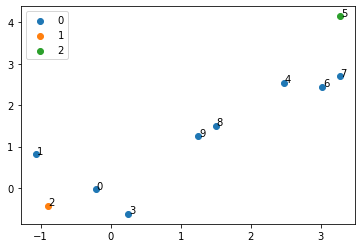

In [0]:
labels = np.zeros(len(points))
labels[2] = 1
labels[5] = 2
plot_clusters(points, labels)

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

#Code  KMeans

In [0]:
class KMeans:

  def __init__(self,  points, k, centers = []):
    self.points = points
    self.K = k
    self.initialize(centers)

  def initialize(self, centers):
    if len(centers) > 0:
      self.centers = centers
    else:
      self.centers =  self.points[np.random.choice(len(self.points), self.K, replace = False)]
    
    return self.centers #return numpy array of K x 2

  def assign(self):
    d = euclidean_distances(self.points, self.centers)
    self.labels = np.argmin(d, axis = 1)
    return self.labels

  def recalculate_cluster_centers(self):
    centers = np.zeros((self.K,2))
    for i in range(self.K):
      kth_cluster = self.points[self.labels == i]
      centers[i] = kth_cluster.mean(axis = 0)
    self.centers = centers
    return centers
  
  def fit(self):
    initial_centers = self.centers.copy()
    old_centers = np.zeros(self.centers.shape)

    while not (old_centers == self.centers).all():
      old_centers = self.centers.copy()
      self.assign()
      self.recalculate_cluster_centers()
    return self.labels

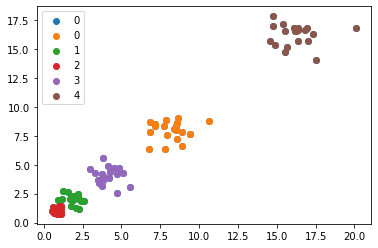

In [0]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))
points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

kmeans = KMeans(points, 5)
labels = kmeans.fit()
plot_clusters(points, labels, show_annotation=False)

## Fitting circles to KMeans by maping $x, y$ to $x^2, y^2$ space.

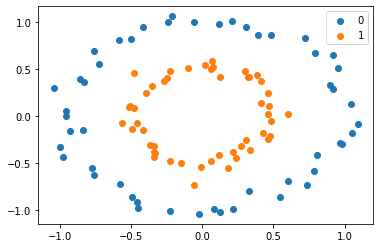

In [0]:
points, _ = make_circles(100, noise=0.06, factor=0.5)
p_sq = points**2
kmeans = KMeans(p_sq, 2)
labels = kmeans.fit()
plot_clusters(points, labels, show_annotation = False)